**DATA DESCRIPTION**

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt



In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/architsharmaa/Boston-Housing-Analysis/master/Boston.csv")
data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(data)

     Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0             1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1             2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2             3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3             4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4             5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
..          ...      ...   ...    ...   ...  ...  ...      ...     ...    ...   ...
501         502  0.06263   0.0  11.93     0  ...  273     21.0  391.99   9.67  22.4
502         503  0.04527   0.0  11.93     0  ...  273     21.0  396.90   9.08  20.6
503         504  0.06076   0.0  11.93     0  ...  273     21.0  396.90   5.64  23.9
504         505  0.10959   0.0  11.93     0  ...  273     21.0  393.45   6.48  22.0
505         506  0.04741   0.0  11.93     0  ...  273     21.0  396.90   7.8

In [ ]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.head(6)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
data.tail(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


**KEEP VALID DATA**

crim
rm
dis
age
ptratio
lstat
medv

In [ ]:
for i in data.columns:
  if i not in['crim','dis','age','ptratio','rm','lstat','medv']:
    del data[i]
print(data)

        crim     rm   age     dis  ptratio  lstat  medv
0    0.00632  6.575  65.2  4.0900     15.3   4.98  24.0
1    0.02731  6.421  78.9  4.9671     17.8   9.14  21.6
2    0.02729  7.185  61.1  4.9671     17.8   4.03  34.7
3    0.03237  6.998  45.8  6.0622     18.7   2.94  33.4
4    0.06905  7.147  54.2  6.0622     18.7   5.33  36.2
..       ...    ...   ...     ...      ...    ...   ...
501  0.06263  6.593  69.1  2.4786     21.0   9.67  22.4
502  0.04527  6.120  76.7  2.2875     21.0   9.08  20.6
503  0.06076  6.976  91.0  2.1675     21.0   5.64  23.9
504  0.10959  6.794  89.3  2.3889     21.0   6.48  22.0
505  0.04741  6.030  80.8  2.5050     21.0   7.88  11.9

[506 rows x 7 columns]


**PRICE**

In [ ]:
price=data['medv']
print(price)
price.describe()

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

**REQUIRED FEATURES**

In [ ]:
feature=data.drop('medv', axis=1)
print(feature)
feature.describe()

        crim     rm   age     dis  ptratio  lstat
0    0.00632  6.575  65.2  4.0900     15.3   4.98
1    0.02731  6.421  78.9  4.9671     17.8   9.14
2    0.02729  7.185  61.1  4.9671     17.8   4.03
3    0.03237  6.998  45.8  6.0622     18.7   2.94
4    0.06905  7.147  54.2  6.0622     18.7   5.33
..       ...    ...   ...     ...      ...    ...
501  0.06263  6.593  69.1  2.4786     21.0   9.67
502  0.04527  6.120  76.7  2.2875     21.0   9.08
503  0.06076  6.976  91.0  2.1675     21.0   5.64
504  0.10959  6.794  89.3  2.3889     21.0   6.48
505  0.04741  6.030  80.8  2.5050     21.0   7.88

[506 rows x 6 columns]


,crim,rm,age,dis,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,68.574901,3.795043,18.455534,12.653063
std,8.601545,0.702617,28.148861,2.105710,2.164946,7.141062
min,0.006320,3.561000,2.900000,1.129600,12.600000,1.730000
25%,0.082045,5.885500,45.025000,2.100175,17.400000,6.950000
50%,0.256510,6.208500,77.500000,3.207450,19.050000,11.360000
75%,3.677082,6.623500,94.075000,5.188425,20.200000,16.955000
max,88.976200,8.780000,100.000000,12.126500,22.000000,37.970000


**Rooms per dwelling V/S Prices**

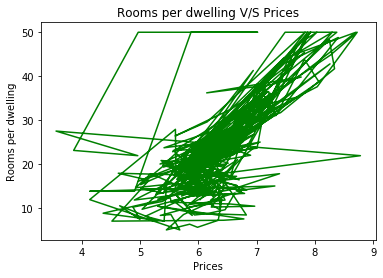

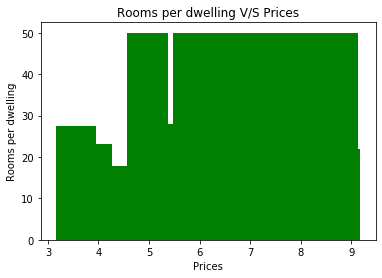

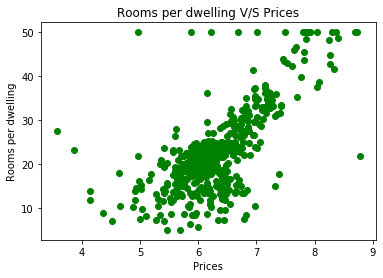

In [ ]:
pt.plot(data['rm'],data['medv'],'g')
pt.title('Rooms per dwelling V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Rooms per dwelling')
pt.show()
pt.bar(data['rm'],data['medv'],color='g')
pt.title('Rooms per dwelling V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Rooms per dwelling')
pt.show()
pt.scatter(feature['rm'],price,color='g')
pt.title('Rooms per dwelling V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Rooms per dwelling')
pt.show()

**Age V/S Prices**

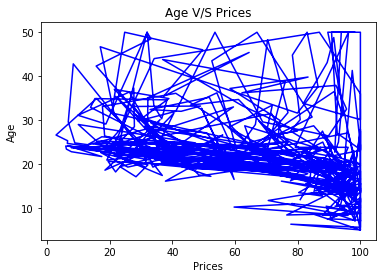

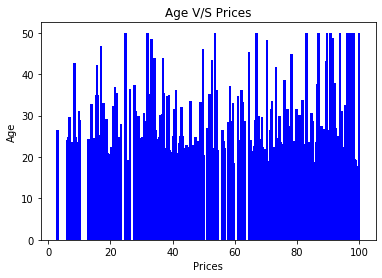

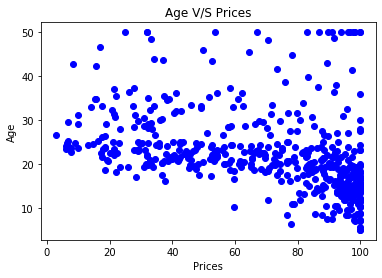

In [ ]:
pt.plot(data['age'],data['medv'],'b')
pt.title('Age V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Age')
pt.show()
pt.bar(feature['age'],price,color='b')
pt.title('Age V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Age')
pt.show()
pt.scatter(feature['age'],price,color='b')
pt.title('Age V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Age')
pt.show()

***Crime Rate V/S Prices***

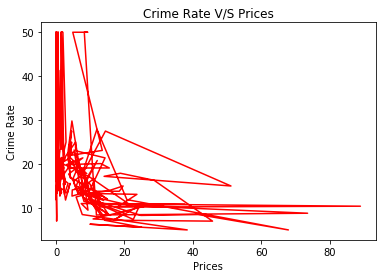

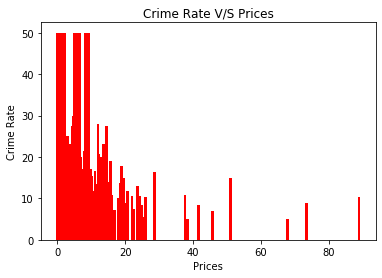

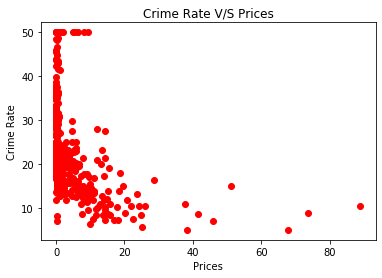

In [ ]:
pt.plot(feature['crim'],price,'r')
pt.title('Crime Rate V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Crime Rate')
pt.show()
pt.bar(feature['crim'],price,color='r')
pt.title('Crime Rate V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Crime Rate')
pt.show()
pt.scatter(feature['crim'],price,color='r')
pt.title('Crime Rate V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Crime Rate')
pt.show()


**Distances to employment centers V/S Prices**

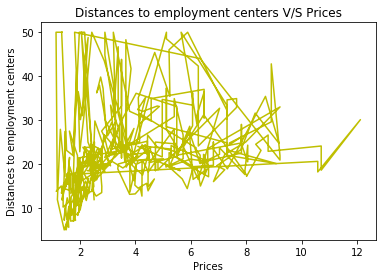

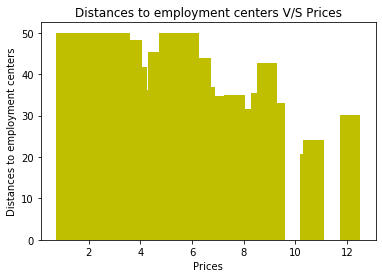

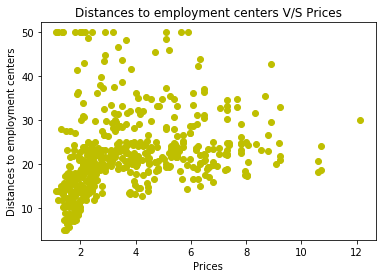

In [ ]:
pt.plot(feature['dis'],price,'y')
pt.title('Distances to employment centers V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Distances to employment centers')
pt.show()
pt.bar(feature['dis'],price,color='y')
pt.title('Distances to employment centers V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Distances to employment centers')
pt.show()
pt.scatter(feature['dis'],price,color='y')
pt.title('Distances to employment centers V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Distances to employment centers')
pt.show()


**Pupil-Teacher Ratio V/S Prices**

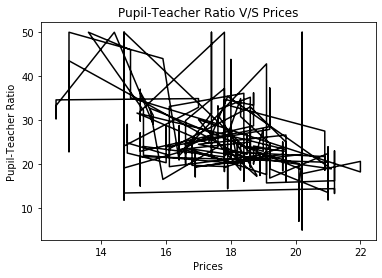

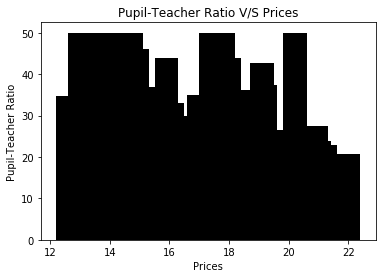

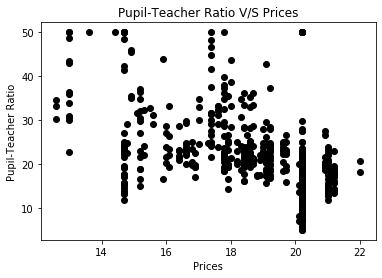

In [ ]:
pt.plot(feature['ptratio'],price,'k')
pt.title('Pupil-Teacher Ratio V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Pupil-Teacher Ratio')
pt.show()
pt.bar(feature['ptratio'],price,color='k')
pt.title('Pupil-Teacher Ratio V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Pupil-Teacher Ratio')
pt.show()
pt.scatter(feature['ptratio'],price,color='k')
pt.title('Pupil-Teacher Ratio V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Pupil-Teacher Ratio')
pt.show()

Lower Status V/S Prices

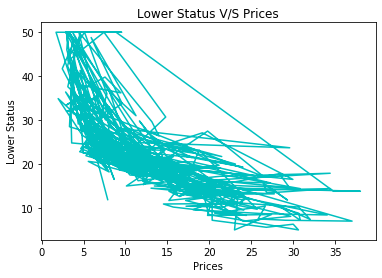

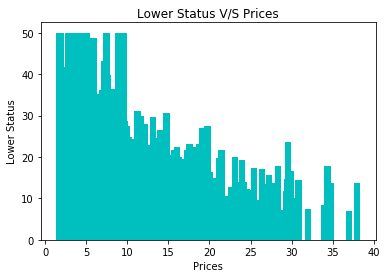

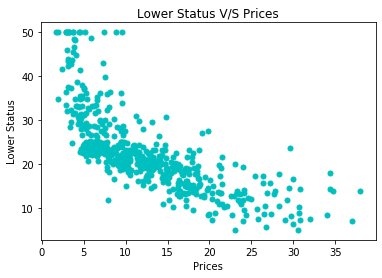

In [ ]:
pt.plot(feature['lstat'],price,'c')
pt.title('Lower Status V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Lower Status')
pt.show()
pt.bar(feature['lstat'],price, color='c')
pt.title('Lower Status V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Lower Status')
pt.show()
pt.scatter(feature['lstat'],price, color='c', s=25, marker='o')
pt.title('Lower Status V/S Prices')
pt.xlabel('Prices')
pt.ylabel('Lower Status')
pt.show()


**SEABORN**

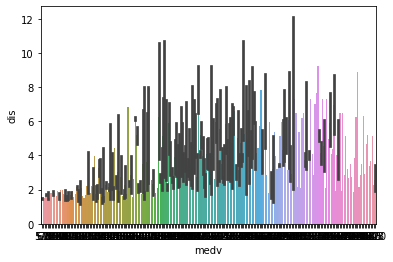

In [ ]:
import seaborn as sb
sb.barplot(x=data['medv'], y=data['dis'])


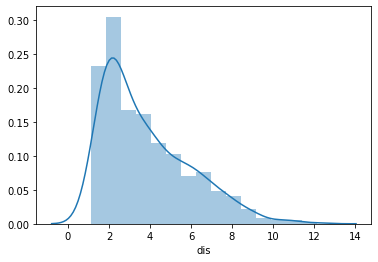

In [ ]:
sb.distplot(data['dis'])

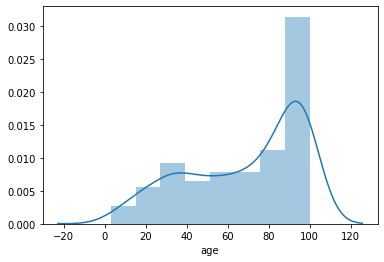

In [ ]:
sb.distplot(data['age'])

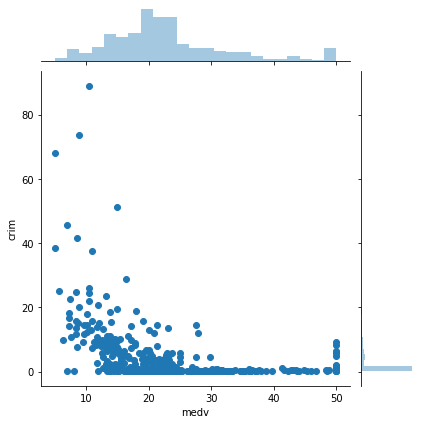

In [ ]:
sb.jointplot(x=data['medv'], y=data['crim'])

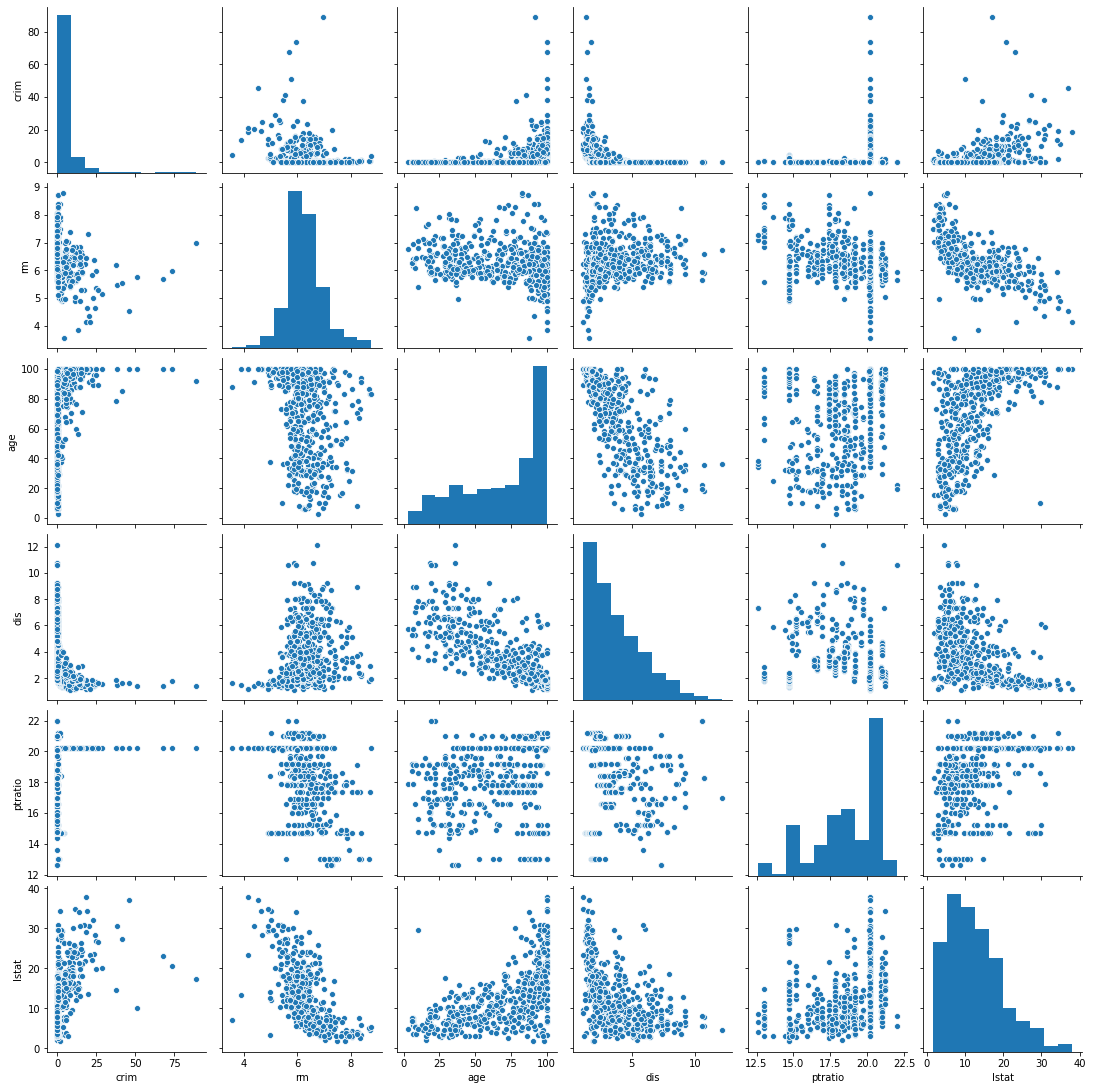

In [ ]:
sb.pairplot(feature)

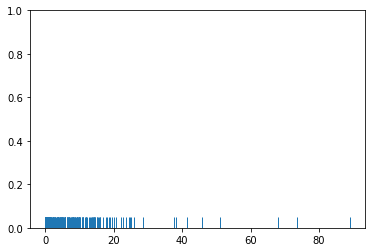

In [ ]:
sb.rugplot(feature['crim'])

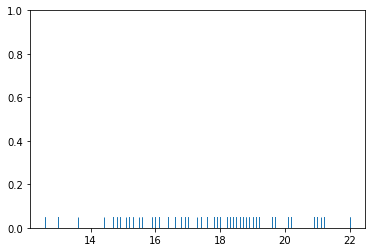

In [ ]:
sb.rugplot(feature['ptratio'])